In [1]:
from DNAFlex.psf import GaussianPSF, hessian_analytical, hessian_autograd, loglike
from scipy.special import erf
import numpy as np
import matplotlib.pyplot as plt

I0=500.0


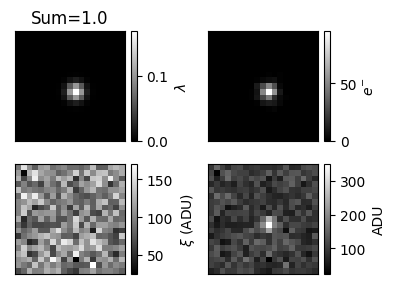

In [2]:
L = 19
omat = np.ones((L,L))
gain0 = 2.2
rmu0 = 100
rvar0 = 700
gain = gain0*omat #ADU/e-
rmu = rmu0*omat #ADU
rvar = rvar0*omat #ADU^2
pixel_size = 108.3 #nm
sigma = 0.22*640/1.4 #zhang 2007
sigma = sigma = sigma/pixel_size
lam0 = 1000 #cps
texp = 1 #seconds
eta = 0.5 #quantum efficiency
I0 = eta*lam0*texp #expected number of photons during exposure time (assume lam0 is determined for now)
x0,y0 = (10,10)

print(f'I0={I0}')
psf = GaussianPSF(x0,y0,L,I0,sigma,gain,rmu,rvar)
adu = psf.generate(plot=True)

In [3]:
x0,y0,sigma,N0 = 10.0,10.0,1.0,1000.0 #parameter guess
theta = np.array([x0,y0,sigma,N0,eta,texp])
counts = np.round(adu/gain).astype(int)
ll = loglike(theta,counts)
print('Log likelihood: ',ll)

Log likelihood:  -270506.533524022


In [4]:
A, B = hessian_analytical(theta,counts)
H1 = A + B
H2 = hessian_autograd(theta,counts)

[[ 0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[-0.  0. -0.  0.]
 [ 0.  0. -0.  0.]
 [-0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[-0. -0.  0.  0.]
 [-0.  0. -0.  0.]
 [ 0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[-0. -0.  0.  0.]
 [-0.  0. -0.  0.]
 [ 0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0. -0.  0.  0.]
 [-0.  0. -0.  0.]
 [ 0. -0.  0.  0.]
 [ 0.  0.  0.  0.]]

[[-28973.53916683 -27352.29715866   5141.42631054      0.        ]
 [-27352.29715866 -29150.91216483   5289.68956684      0.        ]
 [  5141.42631054   5289.68956684  -3409.27453075      0.        ]
 [     0.              0.              0.              0.        ]]
[[ -562.17368679   745.1967041  -3440.92060778     0.        ]
 [  745.1967041   -552.16000508 -3482.66233776     0.        ]
 [-3440.92060778 -3482.66233776 -4212.14557584     0.        ]
 [    0.             0.             0.             0.        ]]


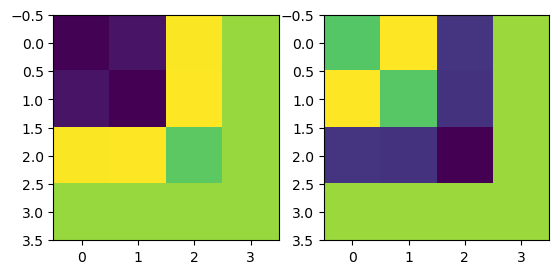

In [6]:
print(A)
print(B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(A)
ax[1].imshow(B)
plt.show()

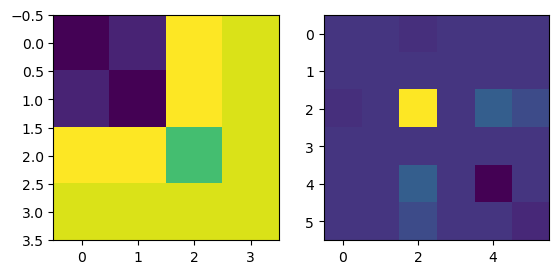

In [5]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(H1)
ax[1].imshow(H2)
plt.show()

In [6]:
print(H1)
print(H2)

[[-29535.71285362 -26607.10045456   1700.50570275      0.        ]
 [-26607.10045456 -29703.07216991   1807.02722908      0.        ]
 [  1700.50570275   1807.02722908  -7621.4201066       0.        ]
 [     0.              0.              0.              0.        ]]
[[  -241.60778196   -300.26980552  -3720.94342039     -0.08138923
    -162.77845412    -81.38922706]
 [  -300.26980552    -47.49347709   -227.32960384      0.03527748
      70.55495856     35.27747928]
 [ -3720.94342039   -227.32960384 152409.07381984     12.90540126
   25810.80251386  12905.40125693]
 [    -0.08138923      0.03527748     12.90540126     -0.0070036
      -0.38954249     -0.19477125]
 [  -162.77845412     70.55495856  25810.80251386     -0.38954249
  -28014.40068432   -389.54249165]
 [   -81.38922706     35.27747928  12905.40125693     -0.19477125
    -389.54249165  -7003.60017108]]
